# Part 1: Data Preparation and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\datascience\\Timeseries\\Timeseries\\exchange_rate.csv")
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

In [2]:
data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [3]:
data.shape


(7588, 2)

In [4]:
data.isna().sum()

date       0
Ex_rate    0
dtype: int64

2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

In [5]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M')



In [6]:
data.set_index('date', inplace=True)

In [7]:
data


,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


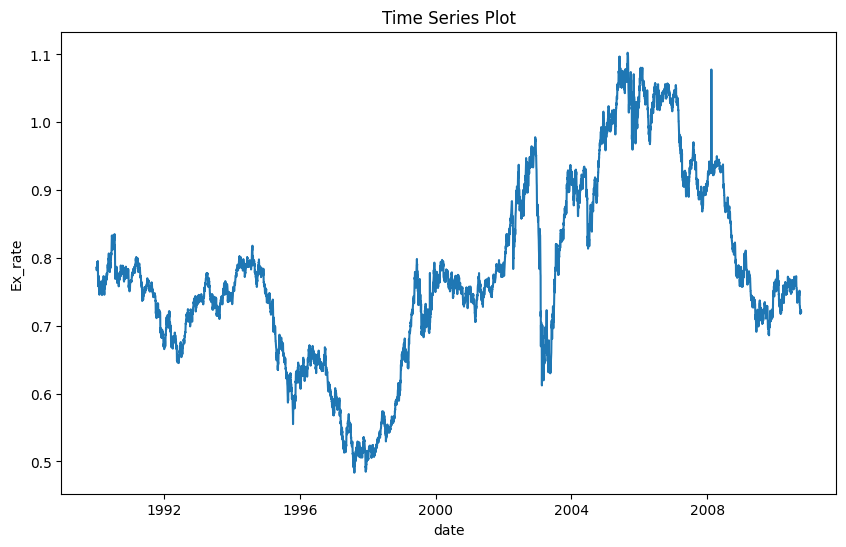

In [8]:
# Plotting the time series
plt.figure(figsize=(10,6))
plt.plot(data)
plt.title('Time Series Plot')
plt.xlabel('date')
plt.ylabel('Ex_rate')
plt.show()

In [9]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()

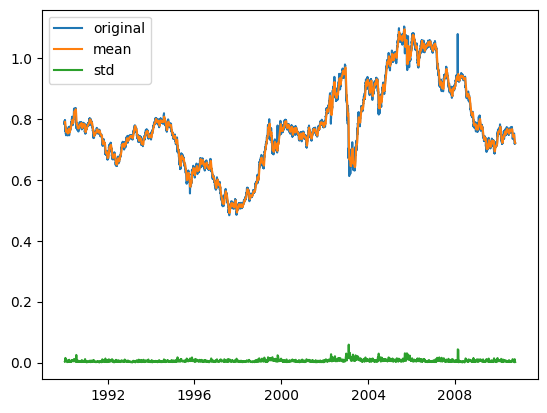

In [10]:
plt.plot(data,label='original')
plt.plot(rolmean,label='mean')
plt.plot(rolstd,label='std')
plt.legend(loc='best')
plt.show()

checking the data is stationary or not 

In [11]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print(f'p-value: {result[1]}')

# If p-value < 0.05, the series is stationary; otherwise, difference the series (d = 1).



p-value: 0.44923273535983155


making stationary by using Augmented Dickey-Fuller

In [12]:
time_series_diff = data.diff().dropna()  # First differencing



In [13]:
# Apply ADF test to differenced series
result_diff = adfuller(time_series_diff)
print(f'p-value after differencing: {result_diff[1]}')

p-value after differencing: 0.0


checking missing values

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


# Part 2: Model Building - ARIMA

1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

In [15]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Plot ACF and PACF to help determine 
p, 
d, and 
q.

ACF Plot: Tells you how past values are related to the current value. Helps you find 
q (number of past errors to use).

PACF Plot: Tells you how past values are related, after removing the influence of shorter lags. Helps you find 
p (number of past values to use).

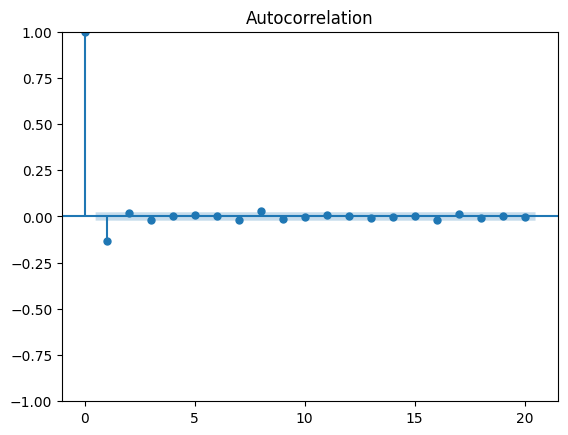

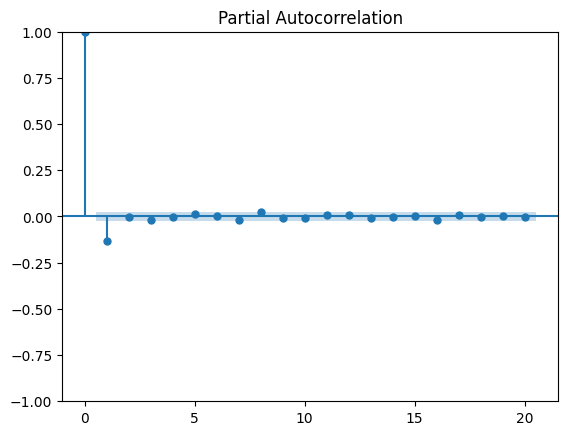

In [16]:
plot_acf(time_series_diff, lags=20)
plot_pacf(time_series_diff, lags=20)
plt.show()

based on visualising the plot p value is 1 which is autoregrresive and q value is 1 which moving average

2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

In [17]:
train_size = int(len(data) * 0.8)  # 80% training, 20% testing
train_data = data['Ex_rate'][:train_size]
test_data = data['Ex_rate'][train_size:]

In [18]:
train_data 

date
1990-01-01    0.785500
1990-01-02    0.781800
1990-01-03    0.786700
1990-01-04    0.786000
1990-01-05    0.784900
                ...   
2006-08-10    1.022620
2006-08-11    1.027591
2006-08-12    1.022349
2006-08-13    1.023395
2006-08-14    1.023552
Name: Ex_rate, Length: 6070, dtype: float64

In [19]:
test_data

date
2006-08-15    1.025347
2006-08-16    1.026905
2006-08-17    1.037344
2006-08-18    1.038875
2006-08-19    1.032855
                ...   
2010-10-06    0.718494
2010-10-07    0.721839
2010-10-08    0.723197
2010-10-09    0.720825
2010-10-10    0.720825
Name: Ex_rate, Length: 1518, dtype: float64

In [20]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1, 2, 1))
model_fit = model.fit()


Diagnostics:

Analyze the residuals to ensure the model is appropriate.

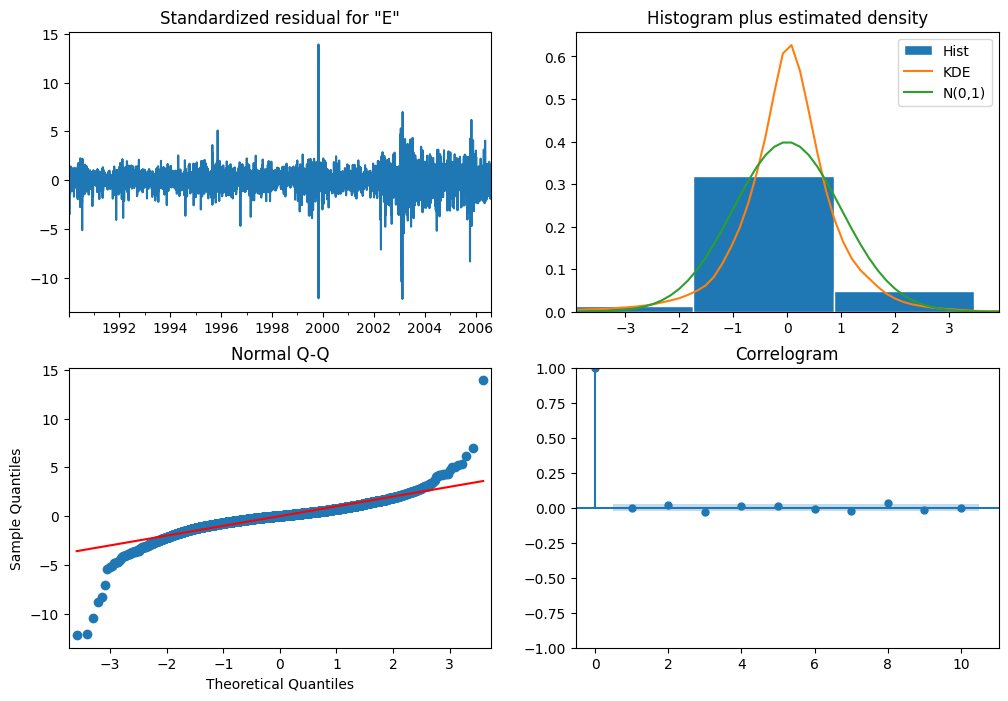

In [21]:
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()


Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

In [22]:
forecast1 = model_fit.forecast(steps=30)  # Forecast for the next 30 days
forecast1

2006-08-15    1.023589
2006-08-16    1.023634
2006-08-17    1.023678
2006-08-18    1.023723
2006-08-19    1.023767
2006-08-20    1.023811
2006-08-21    1.023855
2006-08-22    1.023899
2006-08-23    1.023944
2006-08-24    1.023988
2006-08-25    1.024032
2006-08-26    1.024076
2006-08-27    1.024121
2006-08-28    1.024165
2006-08-29    1.024209
2006-08-30    1.024253
2006-08-31    1.024298
2006-09-01    1.024342
2006-09-02    1.024386
2006-09-03    1.024430
2006-09-04    1.024475
2006-09-05    1.024519
2006-09-06    1.024563
2006-09-07    1.024607
2006-09-08    1.024652
2006-09-09    1.024696
2006-09-10    1.024740
2006-09-11    1.024784
2006-09-12    1.024828
2006-09-13    1.024873
Freq: D, Name: predicted_mean, dtype: float64

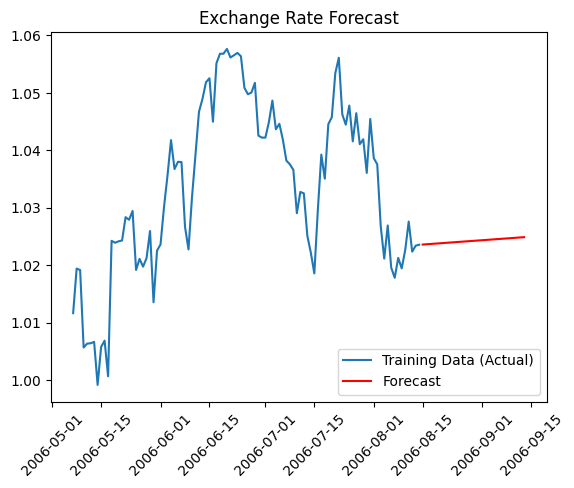

In [23]:


# Plotting
plt.plot(train_data.index[-100:], train_data[-100:], label='Training Data (Actual)')  # Last 100 actual values of the training data
plt.plot(pd.date_range(train_data.index[-1], periods=31, freq='D')[1:], forecast1, label='Forecast', color='red')  # Forecast for 30 days after last train data point
plt.title('Exchange Rate Forecast')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Part 3: Model Building - Exponential Smoothing

1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

# Holt-Winters

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example using Holt-Winters seasonal model
model_exp_smooth = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit_exp_smooth = model_exp_smooth.fit()


Parameter Optimization:

You can optimize parameters using grid search or AIC.

In [25]:
model_fit_exp_smooth = model_exp_smooth.fit(optimized=True)


3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

In [26]:
forecast_exp_smooth = model_fit_exp_smooth.forecast(steps=30)
forecast_exp_smooth


2006-08-15    1.023670
2006-08-16    1.023458
2006-08-17    1.023584
2006-08-18    1.023818
2006-08-19    1.023874
2006-08-20    1.024122
2006-08-21    1.024029
2006-08-22    1.023924
2006-08-23    1.023644
2006-08-24    1.023938
2006-08-25    1.023417
2006-08-26    1.024038
2006-08-27    1.024156
2006-08-28    1.023943
2006-08-29    1.024070
2006-08-30    1.024304
2006-08-31    1.024360
2006-09-01    1.024607
2006-09-02    1.024515
2006-09-03    1.024410
2006-09-04    1.024130
2006-09-05    1.024424
2006-09-06    1.023902
2006-09-07    1.024523
2006-09-08    1.024641
2006-09-09    1.024429
2006-09-10    1.024556
2006-09-11    1.024789
2006-09-12    1.024845
2006-09-13    1.025093
Freq: D, dtype: float64

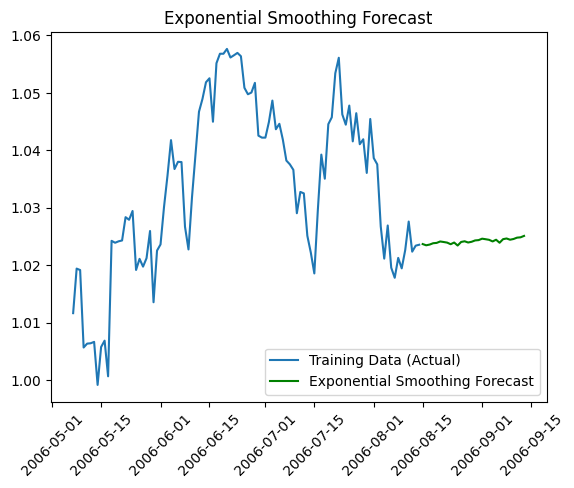

In [27]:

# Plotting the results
plt.plot(train_data.index[-100:], train_data[-100:], label='Training Data (Actual)')  # Last 100 actual values of the training data
plt.plot(pd.date_range(train_data.index[-1], periods=31, freq='D')[1:], forecast_exp_smooth, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Forecast')
plt.xticks(rotation=45)
plt.legend()
plt.show()


#  SimpleExpSmoothing

In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the model
model = SimpleExpSmoothing(train_data)
model_fit = model.fit(smoothing_level=0.2, optimized=False)

# Forecast
forecastsimple = model_fit.forecast(steps=30)
forecastsimple



2006-08-15    1.024238
2006-08-16    1.024238
2006-08-17    1.024238
2006-08-18    1.024238
2006-08-19    1.024238
2006-08-20    1.024238
2006-08-21    1.024238
2006-08-22    1.024238
2006-08-23    1.024238
2006-08-24    1.024238
2006-08-25    1.024238
2006-08-26    1.024238
2006-08-27    1.024238
2006-08-28    1.024238
2006-08-29    1.024238
2006-08-30    1.024238
2006-08-31    1.024238
2006-09-01    1.024238
2006-09-02    1.024238
2006-09-03    1.024238
2006-09-04    1.024238
2006-09-05    1.024238
2006-09-06    1.024238
2006-09-07    1.024238
2006-09-08    1.024238
2006-09-09    1.024238
2006-09-10    1.024238
2006-09-11    1.024238
2006-09-12    1.024238
2006-09-13    1.024238
Freq: D, dtype: float64

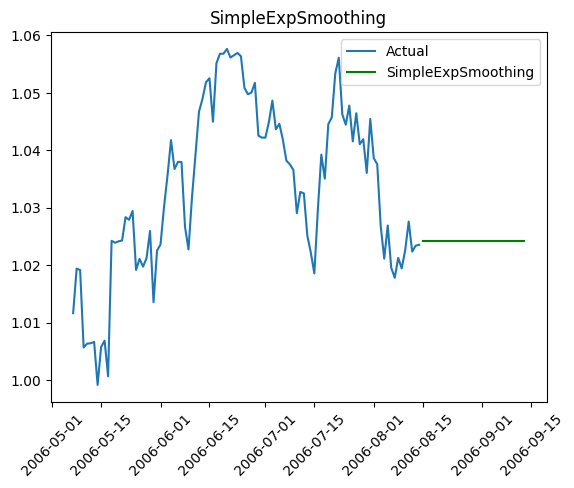

In [29]:
# Plot forecast
plt.plot(train_data.index[-100:], train_data[-100:], label='Actual')
plt.plot(pd.date_range(train_data.index[-1], periods=31, freq='D')[1:], forecastsimple, label='SimpleExpSmoothing', color='green')
plt.title('SimpleExpSmoothing')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Part 4: Evaluation and Comparison

using ARIMA

In [30]:
# Actual values for evaluation
actual = test_data[:30].values  # Ensure only the first 30 values are used for comparison

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# 1. MAE (Mean Absolute Error) using sklearn
mae_arima = mean_absolute_error(actual, forecast1)

# 2. RMSE (Root Mean Squared Error) using sklearn
rmse_arima = np.sqrt(mean_squared_error(actual, forecast1))

# 3. MAPE (Mean Absolute Percentage Error) using sklearn
mape_arima = mean_absolute_percentage_error(actual, forecast1) * 100  # Convert to percentage

# Print the results
print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%")


ARIMA - MAE: 0.011713687101074158, RMSE: 0.012617410386420695, MAPE: 1.1286239023064257%


using holt winter smoothing

In [32]:
mae_arima = mean_absolute_error(actual, forecast_exp_smooth)


rmse_arima = np.sqrt(mean_squared_error(actual,forecast_exp_smooth ))


mape_arima = mean_absolute_percentage_error(actual, forecast_exp_smooth) * 100  # Convert to percentage

# Print the results
print(f"Holt-winters - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%")


Holt-winters - MAE: 0.011771216020469473, RMSE: 0.012682925102422034, MAPE: 1.13416418000669%


In [33]:

mae_arima = mean_absolute_error(actual, forecastsimple)


rmse_arima = np.sqrt(mean_squared_error(actual, forecastsimple))


mape_arima = mean_absolute_percentage_error(actual, forecastsimple) * 100  # Convert to percentage

# Print the results
print(f"SimpleExponential - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%")

SimpleExponential - MAE: 0.011706642005062091, RMSE: 0.012678107678076663, MAPE: 1.1278575765068366%


# Model Comparison
# ARIMA Model:

MAE: 0.0117, RMSE: 0.0126, MAPE: 1.13%

Advantages: Handles trends, seasonality, and non-stationarity well.

Limitations: Requires careful tuning and can be complex.

# Holt-Winters Exponential Smoothing:

MAE: 0.0118, RMSE: 0.0127, MAPE: 1.13%

Advantages: Simple, effective for seasonality and trends.

Limitations: Sensitive to parameter choice, limited for non-seasonal data.

# Simple Exponential Smoothing:

MAE: 0.0117, RMSE: 0.0127, MAPE: 1.13%

Advantages: Simple and fast.

Limitations: Struggles with trend/seasonality.

# 3. Conclusion
ARIMA and Holt-Winters perform similarly, with ARIMA slightly better. Both handle trends and seasonality well.

Simple Exponential Smoothing is the simplest but less effective for complex data.

ARIMA is the best for this dataset, but Holt-Winters is a strong alternative for seasonal data.





